# Лабораторная работа №6
### Выполнила Рындина Валерия, M33351

In [1]:
from keras import models, Input
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from keras.datasets import mnist, fashion_mnist
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

2022-05-24 23:22:54.345312: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-24 23:22:54.345337: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Поиск наилучшей архитектуры

In [2]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

In [3]:
x_train_mnist = x_train_mnist.reshape(x_train_mnist.shape[0], x_train_mnist.shape[1], x_train_mnist.shape[2], 1)
x_test_mnist = x_test_mnist.reshape(x_test_mnist.shape[0], x_test_mnist.shape[1], x_test_mnist.shape[2], 1)

y_train_mnist = to_categorical(y_train_mnist)
y_test_mnist = to_categorical(y_test_mnist)

![Lenet5](Lenet5.png)

In [4]:
model_lenet5 = models.Sequential()
model_lenet5.add(Input(shape=(x_train_mnist.shape[1], x_train_mnist.shape[2], 1)))
model_lenet5.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu'))
model_lenet5.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_lenet5.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model_lenet5.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_lenet5.add(Flatten())
model_lenet5.add(Dense(120, activation='relu'))
model_lenet5.add(Dense(84, activation='relu'))
model_lenet5.add(Dense(10, activation='softmax'))
model_lenet5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2022-05-24 23:23:14.584533: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-24 23:23:14.584560: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-24 23:23:14.584575: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (valrun): /proc/driver/nvidia/version does not exist
2022-05-24 23:23:14.584795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
mist_lenet5 = model_lenet5.fit(x_train_mnist, y_train_mnist, epochs=3, validation_data=(x_test_mnist, y_test_mnist))
model_lenet5.summary()

Epoch 1/3


2022-05-24 23:23:14.782176: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 47040000 exceeds 10% of free system memory.


  28/1875 [..............................] - ETA: 10s - loss: 11.4428 - accuracy: 0.4096

2022-05-24 23:23:15.628041: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22032648 exceeds 10% of free system memory.
2022-05-24 23:23:15.638315: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22032648 exceeds 10% of free system memory.
2022-05-24 23:23:15.638394: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18787392 exceeds 10% of free system memory.
2022-05-24 23:23:15.667970: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22032648 exceeds 10% of free system memory.


1875/1875 [==============================] - 11s 6ms/step - loss: 0.4599 - accuracy: 0.9183 - val_loss: 0.1105 - val_accuracy: 0.9675
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0902 - accuracy: 0.9732 - val_loss: 0.0794 - val_accuracy: 0.9758
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0677 - accuracy: 0.9788 - val_loss: 0.0626 - val_accuracy: 0.9808
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                              

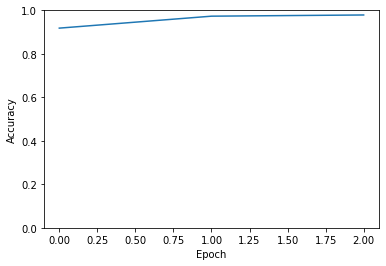

In [6]:
def draw_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()

draw_accuracy(mist_lenet5)

In [7]:
model_2 = models.Sequential()
model_2.add(Input(shape=(x_train_mnist.shape[1], x_train_mnist.shape[2], 1)))
model_2.add(Conv2D(filters=6, kernel_size=(4, 4), activation='relu'))
model_2.add(Conv2D(filters=16, kernel_size=(4, 4), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))
model_2.add(Flatten())
model_2.add(Dense(120, activation='relu'))
model_2.add(Dense(84, activation='relu'))
model_2.add(Dense(10, activation='softmax'))
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
mist_2 = model_2.fit(x_train_mnist, y_train_mnist, epochs=3, validation_data=(x_test_mnist, y_test_mnist))
model_2.summary()

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3160 - accuracy: 0.9333 - val_loss: 0.0915 - val_accuracy: 0.9701
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0765 - accuracy: 0.9767 - val_loss: 0.0599 - val_accuracy: 0.9816
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0613 - accuracy: 0.9809 - val_loss: 0.0717 - val_accuracy: 0.9768
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 25, 25, 6)         102       
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 16)        1552      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                  

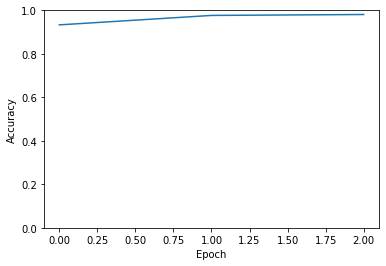

In [9]:
draw_accuracy(mist_2)

In [10]:
model_3 = models.Sequential()
model_3.add(Input(shape=(x_train_mnist.shape[1], x_train_mnist.shape[2], 1)))
model_3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_3.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(120, activation='relu'))
model_3.add(Dense(84, activation='relu'))
model_3.add(Dense(10, activation='softmax'))
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
mist_3 = model_3.fit(x_train_mnist, y_train_mnist, epochs=3, validation_data=(x_test_mnist, y_test_mnist))
model_3.summary()

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6898 - accuracy: 0.8840 - val_loss: 0.1848 - val_accuracy: 0.9452
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1624 - accuracy: 0.9513 - val_loss: 0.1317 - val_accuracy: 0.9612
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1184 - accuracy: 0.9643 - val_loss: 0.1152 - val_accuracy: 0.9651
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 1)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 6)          0         
 2D)                 

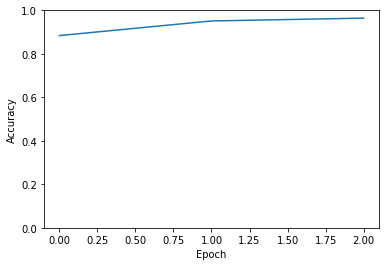

In [12]:
draw_accuracy(mist_3)

### Обучение и тестирование

In [13]:
(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = fashion_mnist.load_data()
x_train_fmnist = x_train_fmnist.reshape(x_train_fmnist.shape[0], x_train_fmnist.shape[1], x_train_fmnist.shape[2], 1)
x_test_fmnist = x_test_fmnist.reshape(x_test_fmnist.shape[0], x_test_fmnist.shape[1], x_test_fmnist.shape[2], 1)

y_test_fmnist_class = y_test_fmnist

y_train_fmnist = to_categorical(y_train_fmnist)
y_test_fmnist = to_categorical(y_test_fmnist)

In [14]:
fmist_2 = model_2.fit(x_train_fmnist, y_train_fmnist, epochs=3, validation_data=(x_test_fmnist, y_test_fmnist))

Epoch 1/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4675 - accuracy: 0.8306 - val_loss: 0.3908 - val_accuracy: 0.8592
Epoch 2/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3405 - accuracy: 0.8736 - val_loss: 0.3700 - val_accuracy: 0.8658
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3030 - accuracy: 0.8881 - val_loss: 0.3370 - val_accuracy: 0.8753


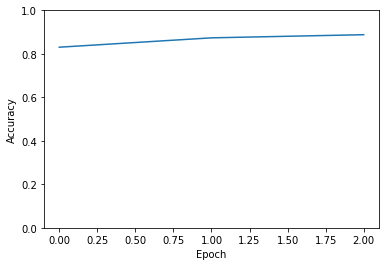

In [15]:
draw_accuracy(fmist_2)

In [16]:
predictions = model_2.predict(x_test_fmnist)
confusion_matrix(y_test_fmnist_class, list(map(np.argmax, predictions)))

313/313 [==============================] - 1s 2ms/step


array([[853,   1,  27,  27,   5,   1,  75,   0,  11,   0],
       [  6, 961,   0,  23,   3,   0,   3,   0,   4,   0],
       [ 13,   0, 759,  12, 131,   0,  80,   0,   5,   0],
       [ 15,   3,  14, 909,  24,   0,  32,   0,   3,   0],
       [  2,   0,  58,  34, 800,   0, 105,   0,   1,   0],
       [  1,   0,   0,   1,   0, 946,   0,  40,   0,  12],
       [144,   0,  87,  37,  73,   0, 647,   0,  12,   0],
       [  0,   0,   0,   0,   0,  12,   0, 973,   0,  15],
       [  7,   0,   5,   4,   5,   2,  11,   2, 963,   1],
       [  0,   0,   0,   0,   0,   7,   0,  50,   1, 942]])

In [17]:
index_max_similar = [[-1 for _ in range(10)] for _ in range(10)]

for i in range(len(x_test_fmnist)):
    cur_class = y_test_fmnist_class[i]
    cur_i = index_max_similar[cur_class]
    for j in range(10):
        if cur_i[j] == -1 or predictions[i][j] > predictions[cur_i[j]][j]:
            index_max_similar[cur_class][j] = i
            cur_i = index_max_similar[cur_class]

index_max_similar

[[7762, 9298, 4143, 1111, 9748, 3466, 8007, 3466, 9928, 8420],
 [8064, 64, 3052, 787, 2741, 9071, 8757, 3360, 8156, 9071],
 [8914, 3880, 8265, 3489, 4037, 9946, 3240, 9946, 9946, 66],
 [979, 4462, 960, 5678, 6584, 2736, 490, 3578, 4148, 3265],
 [1462, 2678, 5255, 3084, 9267, 2573, 6908, 3983, 2617, 8621],
 [5285, 5285, 7798, 6752, 1646, 84, 1646, 8532, 7798, 5685],
 [5806, 7863, 3188, 147, 7130, 5345, 397, 2551, 7343, 5345],
 [1019, 6977, 1019, 1019, 2965, 7875, 6977, 328, 6977, 2914],
 [635, 9055, 4947, 2905, 5231, 3468, 1900, 9524, 30, 2378],
 [5512, 3999, 5512, 3999, 4132, 23, 5512, 441, 5512, 601]]

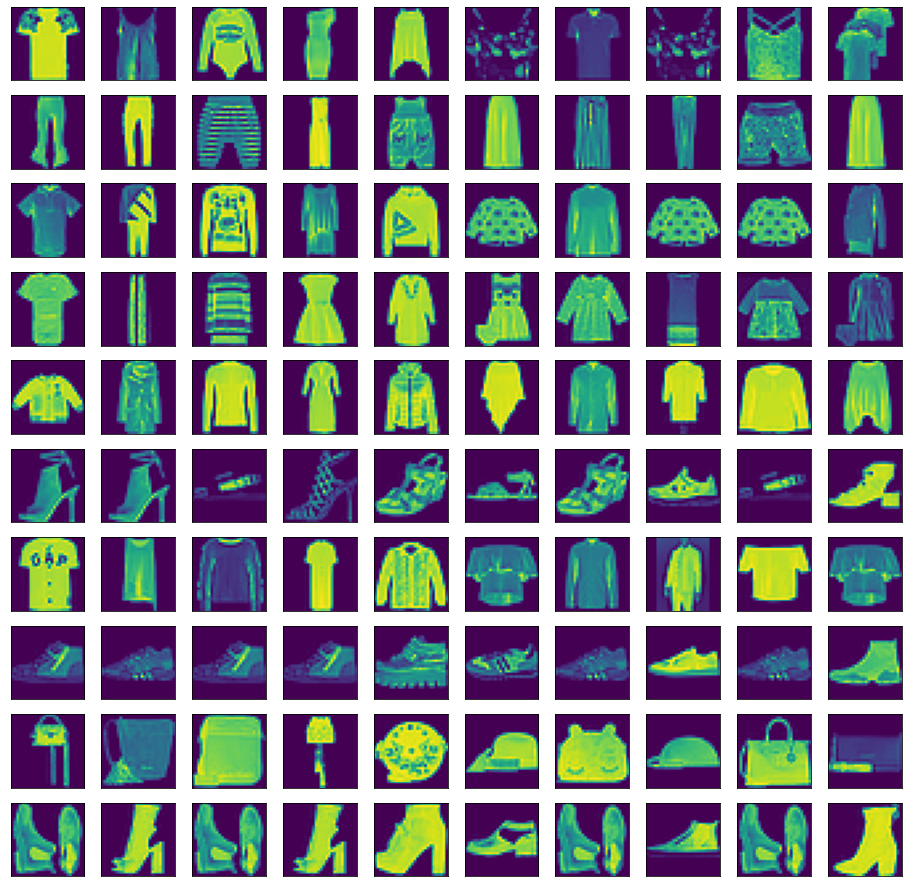

In [18]:
plt.figure(figsize=(16, 16))

for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_fmnist[index_max_similar[i // 10][i % 10]])

plt.show()